<a href="https://colab.research.google.com/github/vaibhavvesmaker/Spotfire/blob/main/NNDL_HW1VaibhavVesmaker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm.autonotebook import tqdm
import pandas as pd
%matplotlib inline
import torch
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
import time

<ipython-input-4-88716e25256b>:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
<ipython-input-4-88716e25256b>:10: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png', 'pdf')


In [ ]:
rng = np.random.default_rng(seed=42)
raw_data = rng.random(20000)
raw_data[0:10000]
X_data = raw_data[0:10000] * 3 - 1.5
print(X_data)
Y_data = raw_data[10000:20000] * 2 - 1
print(Y_data)
Label = (X_data**2 * (np.sin(3*X_data))**2 + Y_data**2 < 0.4).astype(int)
print(Label)

[ 0.82186815 -0.18336468  1.07579376 ... -1.0039591  -0.37976881
 -0.05727668]
[ 0.44145677  0.42247552 -0.59460994 ...  0.69426214  0.34160649
 -0.71747991]
[0 1 1 ... 0 1 0]


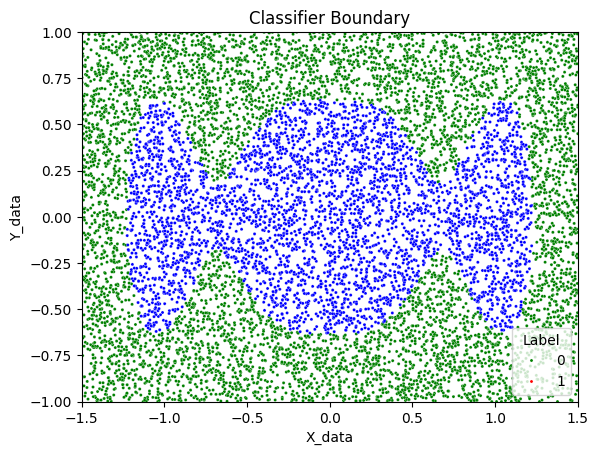

In [ ]:
data = {'X_data': X_data, 'Y_data': Y_data, 'Label': Label}
df = pd.DataFrame(data)

# Create a mask for points in the blue region
blue_mask = df['Label'] == 1

# Create the scatter plot for green points
sns.scatterplot(data=df[~blue_mask], x='X_data', y='Y_data', hue='Label', palette={0: 'green'}, s=5)

# Overlay the scatter plot for blue points with a red background
sns.scatterplot(data=df[blue_mask], x='X_data', y='Y_data', hue='Label', palette={1: 'blue'}, s=5, facecolors='red')



plt.xlim(-1.5, 1.5)
plt.ylim(-1, 1)
plt.xlabel("X_data")
plt.ylabel("Y_data")
plt.title("Classifier Boundary")
plt.show()

In [ ]:
generator = torch.Generator().manual_seed(52)

Feature = torch.tensor(np.column_stack((X_data, Y_data)), dtype=torch.float32)
Label_tensor = torch.tensor(Label, dtype=torch.int64)

dataset = torch.utils.data.TensorDataset(Feature, Label_tensor)

train_ds, test_ds = torch.utils.data.random_split(dataset, [0.7, 0.3], generator)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm.autonotebook import tqdm

# Define the neural network model
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 2)

    def forward(self, x):
      x = torch.tanh(self.fc1(x))
      x = torch.tanh(self.fc2(x))
      x = self.fc3(x)
      return x


# Initialize the model, loss function, and optimizer
model = Classifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Define the training loop
def train(model, train_loader, criterion, optimizer):
    model.train()
    running_loss = 0
    for x, y in train_loader:
        optimizer.zero_grad()
        outputs = model(x)
        loss = criterion(outputs, y)
        running_loss += loss.item()
        loss.backward()
        optimizer.step()
    return running_loss / len(train_loader)

# Define the evaluation loop
def evaluate(model, test_loader, criterion):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for x, y in test_loader:
            outputs = model(x)
            _, predicted = torch.max(outputs.data, 1)
            total += y.size(0)
            correct += (predicted == y).sum().item()
    return correct / total

# Create a data loader for the train set
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=32, shuffle=True)

# Create a data loader for the test set
test_loader = torch.utils.data.DataLoader(test_ds, batch_size=32, shuffle=False)
start_time = time.time()

# Train the model for a fixed number of epochs
device="cpu"
num_epochs = 50
model.to(device)
for epoch in tqdm(range(num_epochs), desc="Epoch"):
    train_loss = train(model, train_loader, criterion, optimizer)
    test_acc = evaluate(model, test_loader, criterion)
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Accuracy: {test_acc:.4f}')

# Report the final test accuracy
test_acc = evaluate(model, test_loader, criterion)
acc = 100.0 * test_acc
print(f'Final Test Accuracy: {acc:.2f}%')

end_time = time.time()

print(f'Time taken: {end_time - start_time:.2f} seconds')

Epoch:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch [1/50], Train Loss: 0.4970, Test Accuracy: 0.8433
Epoch [2/50], Train Loss: 0.2998, Test Accuracy: 0.8713
Epoch [3/50], Train Loss: 0.2828, Test Accuracy: 0.8770
Epoch [4/50], Train Loss: 0.2691, Test Accuracy: 0.8830
Epoch [5/50], Train Loss: 0.2631, Test Accuracy: 0.8693
Epoch [6/50], Train Loss: 0.2563, Test Accuracy: 0.9110
Epoch [7/50], Train Loss: 0.2505, Test Accuracy: 0.9067
Epoch [8/50], Train Loss: 0.2435, Test Accuracy: 0.9220
Epoch [9/50], Train Loss: 0.2176, Test Accuracy: 0.8947
Epoch [10/50], Train Loss: 0.2018, Test Accuracy: 0.9180
Epoch [11/50], Train Loss: 0.1635, Test Accuracy: 0.9617
Epoch [12/50], Train Loss: 0.1416, Test Accuracy: 0.9443
Epoch [13/50], Train Loss: 0.1288, Test Accuracy: 0.9587
Epoch [14/50], Train Loss: 0.1102, Test Accuracy: 0.9613
Epoch [15/50], Train Loss: 0.0978, Test Accuracy: 0.9677
Epoch [16/50], Train Loss: 0.0984, Test Accuracy: 0.9767
Epoch [17/50], Train Loss: 0.1002, Test Accuracy: 0.9617
Epoch [18/50], Train Loss: 0.0983, Test 